This program has the following sections:

web scraping:

1. Creating a function for data collection, Creating a list of url's and Reading data.
2. Creating pandas dataframe with obtained data.
3. Cleaning the data and creating new columns from description column and details column.
4. Deleting the unwanted columns, arranging the columns and sending the data to a csv file.

statistics and Results:

5. statistics on the data.
6. Results Section.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from bs4 import BeautifulSoup
import requests
import os

# web scraping

In [2]:
os.chdir('D:\DKIT\python')

# 1. Creating a function for data collection, Creating a list of url's and Reading data

In [3]:
#Creating empty lists for data collection
brand = []
details = []
prices_cleaned = []
description = []
delivery_cleaned = []

In [4]:
#Function created for data collection
def data_collection():
    i = 0
    laptop_name = []    
    for i in soup.select('.productTitle span'):
        laptop_name.append(i.text)
    lengths = len(laptop_name)   
    for i in range(0,lengths,2):
        brand.append(laptop_name[i])
    for i in range(1,lengths,2):
        details.append(laptop_name[i])
    i = 0
    price = []
    for i in soup.select('.price'):
         price.append(i.text)
    i = 0
    for i in price:
         prices_cleaned.append(i.strip())
    i = 0
    for i in soup.select('.productDescription'):
         description.append(i.text)
    delivery = []
    for i in soup.select('.prd-channels li:nth-child(1)'):
         delivery.append(i.text)
    for i in delivery:
         delivery_cleaned.append(i.strip())

In [5]:
#Initial URL is different. So a seperate code is written for taking data for initial page.
url = 'https://www.currys.ie/ieen/computing/laptops/laptops/315_3226_30328_xx_xx/xx-criteria.html'
r = requests.get(url)
html_doc = r.text
soup = BeautifulSoup(html_doc)
data_collection()

In [6]:
#Creating a list with urls of the remaining 18 urls
url_list = []
part1 = 'https://www.currys.ie/ieen/computing/laptops/laptops/315_3226_30328_xx_xx/'
part3 = '_20/relevance-desc/xx-criteria.html'
for i in range(2,20):
    part2 = str(i)
    new_url = part1+part2+part3
    url_list.append(new_url)

In [7]:
print(url_list)

['https://www.currys.ie/ieen/computing/laptops/laptops/315_3226_30328_xx_xx/2_20/relevance-desc/xx-criteria.html', 'https://www.currys.ie/ieen/computing/laptops/laptops/315_3226_30328_xx_xx/3_20/relevance-desc/xx-criteria.html', 'https://www.currys.ie/ieen/computing/laptops/laptops/315_3226_30328_xx_xx/4_20/relevance-desc/xx-criteria.html', 'https://www.currys.ie/ieen/computing/laptops/laptops/315_3226_30328_xx_xx/5_20/relevance-desc/xx-criteria.html', 'https://www.currys.ie/ieen/computing/laptops/laptops/315_3226_30328_xx_xx/6_20/relevance-desc/xx-criteria.html', 'https://www.currys.ie/ieen/computing/laptops/laptops/315_3226_30328_xx_xx/7_20/relevance-desc/xx-criteria.html', 'https://www.currys.ie/ieen/computing/laptops/laptops/315_3226_30328_xx_xx/8_20/relevance-desc/xx-criteria.html', 'https://www.currys.ie/ieen/computing/laptops/laptops/315_3226_30328_xx_xx/9_20/relevance-desc/xx-criteria.html', 'https://www.currys.ie/ieen/computing/laptops/laptops/315_3226_30328_xx_xx/10_20/releva

In [8]:
for i in url_list:
    url = i
    r = requests.get(url)
    html_doc = r.text
    soup = BeautifulSoup(html_doc)
    data_collection()

In [9]:
print(len(brand))
print(len(description))
print(len(details))
print(len(prices_cleaned))
print(len(details))
print(len(delivery_cleaned))

374
374
374
374
374
374


# 2. Creating pandas dataframe with obtained data.

In [10]:
#All lengths are same so proceeding with the creation of pandas data frame.
pc_data = pd.DataFrame(brand,columns = ['brand'])

In [11]:
pc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   brand   374 non-null    object
dtypes: object(1)
memory usage: 3.0+ KB


In [12]:
pc_data['details'] = details

In [13]:
pc_data['price'] = prices_cleaned
pc_data['delivery'] = delivery_cleaned
pc_data['description'] = description

In [14]:
print(pc_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   brand        374 non-null    object
 1   details      374 non-null    object
 2   price        374 non-null    object
 3   delivery     374 non-null    object
 4   description  374 non-null    object
dtypes: object(5)
memory usage: 14.7+ KB
None


# 3. Cleaning the data and creating new columns from description column and details column.

In [15]:
print(pc_data['brand'].unique())

['HP' 'DELL' 'ACER' 'LENOVO' 'APPLE' 'ASUS' 'SAMSUNG' 'MICROSOFT' 'HUAWEI']


In [16]:
print(pc_data['price'].unique())

['€649.00' '€529.00' '€379.00' '€299.00' '€659.00' '€499.00' '€1,109.00'
 '€219.00' '€159.00' '€429.00' '€319.00' '€599.00' '€719.00' '€399.00'
 '€609.00' '€1,419.00' '€179.00' '€549.00' '€289.00' '€879.00' '€639.00'
 '€359.00' '€1,019.00' '€1,379.00' '€2,749.00' '€959.00' '€349.00'
 '€1,079.00' '€419.00' '€1,649.00' '€1,399.00' '€669.00' '€1,129.00'
 '€1,599.00' '€619.00' '€999.00' '€899.00' '€569.00' '€1,949.00' '€449.00'
 '€388.00' '€839.00' '€509.00' '€539.99' '€1,139.00' '€309.00' '€1,629.00'
 '€224.99' '€239.00' '€539.00' '€389.00' '€329.00' '€1,499.00' '€269.00'
 '€439.00' '€409.00' '€2,039.00' '€249.00' '€679.00' '€3,839.00' '€629.00'
 '€1,049.00' '€339.00' '€1,029.00' '€459.00' '€1,099.00' '€1,199.00'
 '€779.99' '€1,999.00' '€1,699.00' '€479.00' '€799.00' '€689.00'
 '€1,329.00' '€2,979.00' '€2,799.00' '€1,299.00' '€1,849.00' '€739.00'
 '€469.00' '€2,279.00' '€1,439.00' '€909.99' '€1,799.00' '€1,659.00'
 '€369.00' '€2,709.00' '€1,979.00' '€2,899.00' '€979.00' '€859.00'
 '€829.0

In [17]:
pc_data['price'] = pc_data['price'].str.replace(',','')
pc_data['price'] = pc_data['price'].str.replace('€','')

In [18]:
print(pc_data['price'].unique())

['649.00' '529.00' '379.00' '299.00' '659.00' '499.00' '1109.00' '219.00'
 '159.00' '429.00' '319.00' '599.00' '719.00' '399.00' '609.00' '1419.00'
 '179.00' '549.00' '289.00' '879.00' '639.00' '359.00' '1019.00' '1379.00'
 '2749.00' '959.00' '349.00' '1079.00' '419.00' '1649.00' '1399.00'
 '669.00' '1129.00' '1599.00' '619.00' '999.00' '899.00' '569.00'
 '1949.00' '449.00' '388.00' '839.00' '509.00' '539.99' '1139.00' '309.00'
 '1629.00' '224.99' '239.00' '539.00' '389.00' '329.00' '1499.00' '269.00'
 '439.00' '409.00' '2039.00' '249.00' '679.00' '3839.00' '629.00'
 '1049.00' '339.00' '1029.00' '459.00' '1099.00' '1199.00' '779.99'
 '1999.00' '1699.00' '479.00' '799.00' '689.00' '1329.00' '2979.00'
 '2799.00' '1299.00' '1849.00' '739.00' '469.00' '2279.00' '1439.00'
 '909.99' '1799.00' '1659.00' '369.00' '2709.00' '1979.00' '2899.00'
 '979.00' '859.00' '829.00' '1619.00' '1559.00' '1149.00' '2049.00'
 '1899.00' '2149.00' '949.00' '559.00' '1349.00' '1719.00' '279.00'
 '1249.00' '2249.

In [19]:
print(pc_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   brand        374 non-null    object
 1   details      374 non-null    object
 2   price        374 non-null    object
 3   delivery     374 non-null    object
 4   description  374 non-null    object
dtypes: object(5)
memory usage: 14.7+ KB
None


In [20]:
pc_data['delivery'].unique()

array(['FAST delivery', 'Delivery not available',
       'Not available for delivery', 'Standard delivery available'],
      dtype=object)

In [21]:
pc_data['delivery'] = pc_data['delivery'].str.replace('FAST delivery','yes')
pc_data['delivery'] = pc_data['delivery'].str.replace('Not available for delivery','no')
pc_data['delivery'] = pc_data['delivery'].str.replace('Delivery not available','no')
pc_data['delivery'] = pc_data['delivery'].str.replace('Standard delivery available','yes')
print(pc_data['delivery'].unique())

['yes' 'no']


In [22]:
print(pc_data.head())

    brand                                            details   price delivery  \
0      HP  Pavilion 14-dv1629sa 14" Laptop - Intel® Core™...  649.00      yes   
1    DELL  Inspiron 15 3000 15.6" Laptop - Intel® Core™ i...  529.00      yes   
2    ACER  314 14" Chromebook - MediaTek MT8183C, 64 GB e...  379.00      yes   
3  LENOVO  IdeaPad 3 14" Chromebook - MediaTek MT8183, 64...  299.00      yes   
4    ACER  Aspire 5 A514-54 14" Laptop - Intel® Core™ i5,...  659.00      yes   

                                         description  
0  \nWindows 11\nIntel® Core™ i5-1155G7 Processor...  
1  \nFree Upgrade to Windows 11\nIntel® Core™ i3-...  
2  \nChrome OS\nMediaTek MT8183 Processor\nRAM: 4...  
3  \nChrome OS\nMediaTek MT8183 Processor\nRAM: 4...  
4  \nFree Upgrade to Windows 11\nIntel® Core™ i5-...  


In [23]:
print(pc_data['description'])

0      \nWindows 11\nIntel® Core™ i5-1155G7 Processor...
1      \nFree Upgrade to Windows 11\nIntel® Core™ i3-...
2      \nChrome OS\nMediaTek MT8183 Processor\nRAM: 4...
3      \nChrome OS\nMediaTek MT8183 Processor\nRAM: 4...
4      \nFree Upgrade to Windows 11\nIntel® Core™ i5-...
                             ...                        
369    \nFree Upgrade to Windows 11\nIntel® Core™ i7-...
370    \nWindows 10 S\nAMD Ryzen 3 4300U Processor\nR...
371    \nChrome OS\nMediaTek MT8183 Processor\nRAM: 4...
372    \nFree Upgrade to Windows 11\nIntel® Core™ i3-...
373    \nFree Upgrade to Windows 11\nIntel® Core™ i7-...
Name: description, Length: 374, dtype: object


### creating Model_name column using details column.

In [24]:
pc_data[['model_name','excess']] = pc_data['details'].str.split(pat = ',',n=1,expand=True)

In [25]:
pc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   brand        374 non-null    object
 1   details      374 non-null    object
 2   price        374 non-null    object
 3   delivery     374 non-null    object
 4   description  374 non-null    object
 5   model_name   374 non-null    object
 6   excess       374 non-null    object
dtypes: object(7)
memory usage: 20.6+ KB


In [26]:
pc_data.drop(columns=['excess'],inplace=True)

In [27]:
print(pc_data['model_name'])

0      Pavilion 14-dv1629sa 14" Laptop - Intel® Core™ i5
1        Inspiron 15 3000 15.6" Laptop - Intel® Core™ i3
2                  314 14" Chromebook - MediaTek MT8183C
3             IdeaPad 3 14" Chromebook - MediaTek MT8183
4          Aspire 5 A514-54 14" Laptop - Intel® Core™ i5
                             ...                        
369    XPS 15 9500 15.6" Intel® Core™ i7 Laptop - 1 T...
370                   IdeaPad 3 14" Laptop - AMD Ryzen 3
371               11a 11.6" Chromebook - MediaTek MT8183
372       VivoBook X712EA 17.3" Laptop - Intel® Core™ i3
373         VivoBook X415JA 14" Laptop - Intel® Core™ i7
Name: model_name, Length: 374, dtype: object


In [28]:
print(pc_data['model_name'].unique())

['Pavilion 14-dv1629sa 14" Laptop - Intel® Core™ i5'
 'Inspiron 15 3000 15.6" Laptop - Intel® Core™ i3'
 '314 14" Chromebook - MediaTek MT8183C'
 'IdeaPad 3 14" Chromebook - MediaTek MT8183'
 'Aspire 5 A514-54 14" Laptop - Intel® Core™ i5'
 '15s-fq4553sa 15.6" Laptop - Intel® Core™ i5'
 'MacBook Air 13.3" (2020) - M1'
 'Stream 11-ak0512sa 11.6" Laptop - Intel® Celeron™'
 'C202 11.6" Chromebook - 32 GB eMMC'
 'Stream 11-ak0513sa 11.6" Laptop - Intel® Celeron™'
 '15-dw1513sa 15.6" Laptop - Intel® Core™ i3'
 'IdeaPad 3i 14" Laptop - Intel® Core™ i5'
 'IdeaPad 3 15.6" Laptop - AMD Athlon Gold'
 'Swift 1 14" Laptop - Intel® Pentium™'
 'Pavilion 15-eh0523sa 15.6" Laptop - AMD Ryzen 5'
 '715 15.6" Chromebook - Intel® Pentium®'
 'Inspiron 15 3511 15.6" Laptop - Intel® Core™ i5'
 'MacBook Pro 13.3" (2020) - M1' 'C223 11.6" Chromebook - Intel® Celeron®'
 'Inspiron 15 3000 15.6" Laptop - AMD Ryzen 5'
 '14a-na0500sa 14" Chromebook - Intel® Celeron®'
 'Aspire 3 15.6" Laptop - Intel® Core™ i7'
 'Ins

In [29]:
pc_data[['model_name_real','excess']] = pc_data['model_name'].str.rsplit(pat = '-',n=1,expand=True)
pc_data.drop(columns=['excess','model_name'],inplace=True)

In [30]:
pc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   brand            374 non-null    object
 1   details          374 non-null    object
 2   price            374 non-null    object
 3   delivery         374 non-null    object
 4   description      374 non-null    object
 5   model_name_real  374 non-null    object
dtypes: object(6)
memory usage: 17.7+ KB


In [31]:
print(pc_data['model_name_real'])

0               Pavilion 14-dv1629sa 14" Laptop 
1                 Inspiron 15 3000 15.6" Laptop 
2                            314 14" Chromebook 
3                      IdeaPad 3 14" Chromebook 
4                   Aspire 5 A514-54 14" Laptop 
                         ...                    
369    XPS 15 9500 15.6" Intel® Core™ i7 Laptop 
370                        IdeaPad 3 14" Laptop 
371                        11a 11.6" Chromebook 
372                VivoBook X712EA 17.3" Laptop 
373                  VivoBook X415JA 14" Laptop 
Name: model_name_real, Length: 374, dtype: object


In [32]:
pc_data.rename({'model_name_real':'model_name'},axis=1,inplace=True)

In [33]:
print(pc_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   brand        374 non-null    object
 1   details      374 non-null    object
 2   price        374 non-null    object
 3   delivery     374 non-null    object
 4   description  374 non-null    object
 5   model_name   374 non-null    object
dtypes: object(6)
memory usage: 17.7+ KB
None


### creating colour column using details column.

In [34]:
pc_data[['details','colour']] = pc_data['details'].str.rsplit(',',n=1,expand=True)

In [35]:
print(pc_data['colour'].unique())

[' Silver' ' Black' ' Blue' ' Black & Silver' ' Space Grey' ' White'
 ' Grey & Black' ' Grey' ' Mystic Silver' ' Platinum' ' Mystic Navy'
 ' Blue & Grey' ' Abyss Blue' ' Gold' ' White & Rose Gold'
 ' Graphite Grey' ' Abyss Blue Fabric' ' Red' ' Sandstone' ' Graphite'
 ' Slate Green' ' Matte Black' ' Obsidian' ' Ice Blue' ' Glacier' ' Pink'
 ' Slate Grey']


In [36]:
pc_data['colour'] = pc_data['colour'].str.strip()
pc_data['colour'] = pc_data['colour'].str.lower()
print(pc_data['colour'].unique())

['silver' 'black' 'blue' 'black & silver' 'space grey' 'white'
 'grey & black' 'grey' 'mystic silver' 'platinum' 'mystic navy'
 'blue & grey' 'abyss blue' 'gold' 'white & rose gold' 'graphite grey'
 'abyss blue fabric' 'red' 'sandstone' 'graphite' 'slate green'
 'matte black' 'obsidian' 'ice blue' 'glacier' 'pink' 'slate grey']


In [37]:
pc_data.drop(columns=['details'],inplace=True)

In [38]:
pc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   brand        374 non-null    object
 1   price        374 non-null    object
 2   delivery     374 non-null    object
 3   description  374 non-null    object
 4   model_name   374 non-null    object
 5   colour       374 non-null    object
dtypes: object(6)
memory usage: 17.7+ KB


In [39]:
pc_data['description'] = pc_data['description'].str.strip()

In [40]:
pc_data['description'] = pc_data['description'].str.replace('Everyday: All-rounder for work and play','')
pc_data['description'] = pc_data['description'].str.replace('Social: Basic computing on the go','')
pc_data['description'] = pc_data['description'].str.replace('Achieve: Fast computing with the latest tech','')
pc_data['description'] = pc_data['description'].str.strip()

In [41]:
pc_data[['operating_system','excess']] = pc_data['description'].str.split(pat = '\n',n=1,expand=True)

### creating operating_system column using description column.

In [42]:
pc_data['operating_system'].unique()

array(['Windows 11', 'Free Upgrade to Windows 11', 'Chrome OS',
       'macOS 11.0 Big Sur', 'macOS 12.0 Monterey', 'Windows 11 S',
       'Windows 10 S', 'Windows 10 Pro', 'Android 11', 'MacOS',
       'Windows 10'], dtype=object)

In [43]:
print(len(pc_data['operating_system']))

374


In [44]:
pc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   brand             374 non-null    object
 1   price             374 non-null    object
 2   delivery          374 non-null    object
 3   description       374 non-null    object
 4   model_name        374 non-null    object
 5   colour            374 non-null    object
 6   operating_system  374 non-null    object
 7   excess            374 non-null    object
dtypes: object(8)
memory usage: 23.5+ KB


### Creating processor and processor company columns from excess column which is created while cleaning description.

In [45]:
pc_data[['Processor','data']] = pc_data['excess'].str.split(pat = '\n',n=1,expand=True)

In [46]:
len(pc_data['Processor'])

374

In [47]:
print(pc_data['Processor'].unique())

['Intel® Core™ i5-1155G7 Processor' 'Intel® Core™ i3-1115G4 Processor'
 'MediaTek MT8183 Processor' 'Intel® Core™ i5-1135G7 Processor'
 'Apple M1 chip' 'Intel® Celeron® N4020 Processor'
 'MediaTek MT8173C Processor' 'Intel® Core™ i3-10110U Processor'
 'AMD Athlon Gold 3150U Processor'
 'Intel® Pentium® Silver N6000 processor' 'AMD Ryzen 5 4500U Processor'
 'Intel® Pentium® Gold 4417U Processor' 'Intel® Core™ i5-1035G1 Processor'
 'Intel® Celeron® N3350 Processor' 'AMD Ryzen 5 3500U Processor'
 'Intel® Core™ i7-1065G7 Processor'
 'Intel® Pentium® Silver N5030 processor' 'AMD Ryzen 5 5500U Processor'
 'Intel® Celeron® N4000 Processor' 'Intel® Evo™ platform'
 'Intel® Celeron® N4500 Processor' 'Apple M1 Pro chip'
 'Intel® Core™ i7-11390H Processor' 'Intel® Pentium® Gold 7505 Processor'
 'Intel® Core™ i7-1165G7 Processor' 'Intel® Core™ i7-10510U Processor'
 'Intel® Pentium® Gold 6500Y Processor' 'Intel® Core™ i3-1125G4 Processor'
 'MediaTek P60T Processor' 'AMD Athlon Silver 3050U Processor

In [48]:
pc_data['Processor'] = pc_data['Processor'].replace('Unlocked Intel® Core™ i9-10980HK Processor','Intel® Core™ i9-10980HK Processor')

In [49]:
pc_data[['processor_company','series']] = pc_data['Processor'].str.split(pat=' ',n=1,expand = True)

In [50]:
print(pc_data['processor_company'].unique())

['Intel®' 'MediaTek' 'Apple' 'AMD' 'MediaTek\xa0Kompanio\xa08192'
 'Qualcomm']


In [51]:
pc_data['processor_company'].replace('MediaTek\xa0Kompanio\xa08192','MediaTek',inplace=True)

In [52]:
pc_data['processor_company'].replace('Intel®','Intel',inplace=True)

In [53]:
print(pc_data['processor_company'].unique())

['Intel' 'MediaTek' 'Apple' 'AMD' 'Qualcomm']


In [54]:
pc_data['Processor'] = pc_data['Processor'].str.replace('®','')
pc_data['Processor'] = pc_data['Processor'].str.replace('™','')

In [55]:
pc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              374 non-null    object
 1   price              374 non-null    object
 2   delivery           374 non-null    object
 3   description        374 non-null    object
 4   model_name         374 non-null    object
 5   colour             374 non-null    object
 6   operating_system   374 non-null    object
 7   excess             374 non-null    object
 8   Processor          374 non-null    object
 9   data               374 non-null    object
 10  processor_company  374 non-null    object
 11  series             374 non-null    object
dtypes: object(12)
memory usage: 35.2+ KB


In [56]:
pc_data.drop(columns=['data'],inplace=True)

In [57]:
pc_data.drop(columns=['series'],inplace=True)

In [58]:
pc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              374 non-null    object
 1   price              374 non-null    object
 2   delivery           374 non-null    object
 3   description        374 non-null    object
 4   model_name         374 non-null    object
 5   colour             374 non-null    object
 6   operating_system   374 non-null    object
 7   excess             374 non-null    object
 8   Processor          374 non-null    object
 9   processor_company  374 non-null    object
dtypes: object(10)
memory usage: 29.3+ KB


In [59]:
print(pc_data['excess'])

0      Intel® Core™ i5-1155G7 Processor\nRAM: 8 GB / ...
1      Intel® Core™ i3-1115G4 Processor\nRAM: 8 GB / ...
2      MediaTek MT8183 Processor\nRAM: 4 GB / Storage...
3      MediaTek MT8183 Processor\nRAM: 4 GB / Storage...
4      Intel® Core™ i5-1135G7 Processor\nRAM: 8 GB / ...
                             ...                        
369    Intel® Core™ i7-10750H Processor\nRAM: 16 GB /...
370    AMD Ryzen 3 4300U Processor\nRAM: 4 GB / Stora...
371    MediaTek MT8183 Processor\nRAM: 4 GB / Storage...
372    Intel® Core™ i3-1115G4 Processor\nRAM: 8 GB / ...
373    Intel® Core™ i7-1065G7 Processor\nRAM: 8 GB / ...
Name: excess, Length: 374, dtype: object


### Creating RAM column,storage column and storage type column from excess column.

In [60]:
pc_data['excess'] = pc_data['excess'].str.replace('Memory: ','RAM: ')

In [61]:
pc_data['ram_in_GB'] = pc_data['excess'].str.extract(r'RAM: ?(\d+)')

In [62]:
pc_data['ram_in_GB'].unique()

array(['8', '4', '16', '32'], dtype=object)

In [63]:
pc_data[['storage','storage_type']] = pc_data['excess'].str.extract(r'Storage: ?(\d+? \w+)? (\w+)')

In [64]:
print(pc_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              374 non-null    object
 1   price              374 non-null    object
 2   delivery           374 non-null    object
 3   description        374 non-null    object
 4   model_name         374 non-null    object
 5   colour             374 non-null    object
 6   operating_system   374 non-null    object
 7   excess             374 non-null    object
 8   Processor          374 non-null    object
 9   processor_company  374 non-null    object
 10  ram_in_GB          374 non-null    object
 11  storage            373 non-null    object
 12  storage_type       373 non-null    object
dtypes: object(13)
memory usage: 38.1+ KB
None


In [65]:
print(pc_data['storage'].unique())

['512 GB' '256 GB' '64 GB' '32 GB' '128 GB' '1 TB' '2 TB' nan]


In [66]:
pc_data['storage'] = pc_data['storage'].replace('256 GB','256')
pc_data['storage'] = pc_data['storage'].replace('128 GB','128')
pc_data['storage'] = pc_data['storage'].replace('64 GB','64')
pc_data['storage'] = pc_data['storage'].replace('512 GB','256')
pc_data['storage'] = pc_data['storage'].replace('32 GB','256')
pc_data['storage'] = pc_data['storage'].replace('1 TB','1000')
pc_data['storage'] = pc_data['storage'].replace('2 TB','2000')

In [67]:
print(pc_data['storage'].unique())

['256' '64' '128' '1000' '2000' nan]


In [68]:
pc_data['storage'] = pc_data['storage'].astype(float)

In [69]:
pc_data.rename({'storage':'storage_in_GB'},axis=1,inplace=True)

### Creating touchscreen column from excess column.

In [70]:
pc_data['touch_screen'] = pc_data['excess'].str.contains('touch.*')

In [71]:
pc_data['touch_screen'].replace(True,'yes',inplace=True)
pc_data['touch_screen'].replace(False,'no',inplace=True)

### Creating screen_size column using model_name column.

In [72]:
pc_data['model_name'] = pc_data['model_name'].str.replace('”','"')
pc_data[['temp1','temp2']] = pc_data['model_name'].str.split('"',expand=True)

In [73]:
pc_data['temp1'] = 'dummy ' + pc_data['temp1'].astype(str)

In [74]:
pc_data[['temp3','screen_size']] = pc_data['temp1'].str.rsplit(' ',n=1,expand=True)

In [75]:
print(pc_data['screen_size'].unique())

['14' '15.6' '13.3' '11.6' '12' '17.3' '16' '10.5' '10.1' '12.5' '16.1'
 '13.5' '13.4' '17' '10.3' '13' '15' '11' '8.3' '13.9' '14.2' '12.3']


In [76]:
print(pc_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              374 non-null    object 
 1   price              374 non-null    object 
 2   delivery           374 non-null    object 
 3   description        374 non-null    object 
 4   model_name         374 non-null    object 
 5   colour             374 non-null    object 
 6   operating_system   374 non-null    object 
 7   excess             374 non-null    object 
 8   Processor          374 non-null    object 
 9   processor_company  374 non-null    object 
 10  ram_in_GB          374 non-null    object 
 11  storage_in_GB      373 non-null    float64
 12  storage_type       373 non-null    object 
 13  touch_screen       374 non-null    object 
 14  temp1              374 non-null    object 
 15  temp2              374 non-null    object 
 16  temp3              374 non

In [77]:
pc_data.drop(columns=['temp1','temp2','temp3'],inplace=True)

In [78]:
pc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              374 non-null    object 
 1   price              374 non-null    object 
 2   delivery           374 non-null    object 
 3   description        374 non-null    object 
 4   model_name         374 non-null    object 
 5   colour             374 non-null    object 
 6   operating_system   374 non-null    object 
 7   excess             374 non-null    object 
 8   Processor          374 non-null    object 
 9   processor_company  374 non-null    object 
 10  ram_in_GB          374 non-null    object 
 11  storage_in_GB      373 non-null    float64
 12  storage_type       373 non-null    object 
 13  touch_screen       374 non-null    object 
 14  screen_size        374 non-null    object 
dtypes: float64(1), object(14)
memory usage: 44.0+ KB


### Creating battery_life column from excess column.

In [79]:
pc_data[['temp1','battery_life']] = pc_data['excess'].str.split('Battery life:',n=1,expand = True)

In [80]:
pc_data[['battery_life','temp2']] = pc_data['battery_life'].str.split('\n',n=1,expand=True)

In [81]:
pc_data.drop(columns=['temp1','temp2'],inplace=True)

In [82]:
pc_data['battery_life'] = pc_data['battery_life'].str.strip()

In [83]:
print(pc_data['battery_life'].unique())

['Up to 8 hours' 'Up to 6.5 hours' 'Up to 12 hours' 'Up to 16 hours'
 'Up to 10 hours' 'Up to 18 hours' 'Up to 13 hours' 'Up to 6 hours' None
 'Up to 7 hours' 'Up to 20 hours' 'Up to 8.5 hours' 'Up to 13.5 hours'
 'Up to 21 hours' 'Up to 11 hours' 'Up to 9.5 hours' 'Up to 9 hours'
 'Up to 10.5 hours' 'Up to 11.5 hours' 'Up to 14 hours' 'Up to 5 hours'
 'Up to 12.5 hours' 'Up to 15 hours' 'Up to 16.5 hours' 'Up to 17.5 hours'
 'Up to 7.5 hours' 'Up to 19 hours' 'Up to 15.5 hours' 'Up to 17 hours'
 'Up to 22 hours' 'Up to 5.5 hours' 'Up to 20.5 hours']


In [84]:
pc_data['battery_life'] = pc_data['battery_life'].str.replace('Up to ','')
pc_data['battery_life'] = pc_data['battery_life'].str.replace('hours','')
print(pc_data['battery_life'].unique())

['8 ' '6.5 ' '12 ' '16 ' '10 ' '18 ' '13 ' '6 ' None '7 ' '20 ' '8.5 '
 '13.5 ' '21 ' '11 ' '9.5 ' '9 ' '10.5 ' '11.5 ' '14 ' '5 ' '12.5 ' '15 '
 '16.5 ' '17.5 ' '7.5 ' '19 ' '15.5 ' '17 ' '22 ' '5.5 ' '20.5 ']


In [85]:
pc_data['battery_life'] = pc_data['battery_life'].str.strip()
pc_data['battery_life'] = pc_data['battery_life'].astype(float)
pc_data.rename({'battery_life':'battery_life_in_hours'},axis=1,inplace=True)

In [86]:
print(pc_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand                  374 non-null    object 
 1   price                  374 non-null    object 
 2   delivery               374 non-null    object 
 3   description            374 non-null    object 
 4   model_name             374 non-null    object 
 5   colour                 374 non-null    object 
 6   operating_system       374 non-null    object 
 7   excess                 374 non-null    object 
 8   Processor              374 non-null    object 
 9   processor_company      374 non-null    object 
 10  ram_in_GB              374 non-null    object 
 11  storage_in_GB          373 non-null    float64
 12  storage_type           373 non-null    object 
 13  touch_screen           374 non-null    object 
 14  screen_size            374 non-null    object 
 15  batter

In [87]:
print(pc_data.head())

    brand   price delivery                                        description  \
0      HP  649.00      yes  Windows 11\nIntel® Core™ i5-1155G7 Processor\n...   
1    DELL  529.00      yes  Free Upgrade to Windows 11\nIntel® Core™ i3-11...   
2    ACER  379.00      yes  Chrome OS\nMediaTek MT8183 Processor\nRAM: 4 G...   
3  LENOVO  299.00      yes  Chrome OS\nMediaTek MT8183 Processor\nRAM: 4 G...   
4    ACER  659.00      yes  Free Upgrade to Windows 11\nIntel® Core™ i5-11...   

                         model_name          colour  \
0  Pavilion 14-dv1629sa 14" Laptop           silver   
1    Inspiron 15 3000 15.6" Laptop            black   
2               314 14" Chromebook           silver   
3         IdeaPad 3 14" Chromebook             blue   
4      Aspire 5 A514-54 14" Laptop   black & silver   

             operating_system  \
0                  Windows 11   
1  Free Upgrade to Windows 11   
2                   Chrome OS   
3                   Chrome OS   
4  Free Upgrade t

# 4. Deleting the unwanted columns, arranging the columns and sending the data to a csv file.

In [88]:
#deleting unwanted columns
pc_data.drop(columns=['description','excess'],inplace=True)

In [89]:
#arranging the columns
pc_data = pc_data.reindex(columns=['brand','model_name','colour','operating_system','Processor','processor_company','ram_in_GB','storage_in_GB','storage_type','touch_screen','screen_size','battery_life_in_hours','delivery','price'])

In [90]:
pc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand                  374 non-null    object 
 1   model_name             374 non-null    object 
 2   colour                 374 non-null    object 
 3   operating_system       374 non-null    object 
 4   Processor              374 non-null    object 
 5   processor_company      374 non-null    object 
 6   ram_in_GB              374 non-null    object 
 7   storage_in_GB          373 non-null    float64
 8   storage_type           373 non-null    object 
 9   touch_screen           374 non-null    object 
 10  screen_size            374 non-null    object 
 11  battery_life_in_hours  231 non-null    float64
 12  delivery               374 non-null    object 
 13  price                  374 non-null    object 
dtypes: float64(2), object(12)
memory usage: 41.0+ KB


In [91]:
pc_data.rename({'price':'price_in_Euro','brand':'company'},axis=1,inplace=True)

In [92]:
#checking for null values in each column.
print(pc_data.isnull().sum())

company                    0
model_name                 0
colour                     0
operating_system           0
Processor                  0
processor_company          0
ram_in_GB                  0
storage_in_GB              1
storage_type               1
touch_screen               0
screen_size                0
battery_life_in_hours    143
delivery                   0
price_in_Euro              0
dtype: int64


In [93]:
#dropping duplicates in the data.
pc_data.drop_duplicates(keep='first',inplace=True)

In [94]:
print(pc_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company                374 non-null    object 
 1   model_name             374 non-null    object 
 2   colour                 374 non-null    object 
 3   operating_system       374 non-null    object 
 4   Processor              374 non-null    object 
 5   processor_company      374 non-null    object 
 6   ram_in_GB              374 non-null    object 
 7   storage_in_GB          373 non-null    float64
 8   storage_type           373 non-null    object 
 9   touch_screen           374 non-null    object 
 10  screen_size            374 non-null    object 
 11  battery_life_in_hours  231 non-null    float64
 12  delivery               374 non-null    object 
 13  price_in_Euro          374 non-null    object 
dtypes: float64(2), object(12)
memory usage: 43.8+ KB
None


In [95]:
pc_data['ram_in_GB'] = pc_data['ram_in_GB'].astype(int)
pc_data['screen_size'] = pc_data['screen_size'].astype(float)
pc_data['price_in_Euro'] = pc_data['price_in_Euro'].astype(float)

In [96]:
print(pc_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company                374 non-null    object 
 1   model_name             374 non-null    object 
 2   colour                 374 non-null    object 
 3   operating_system       374 non-null    object 
 4   Processor              374 non-null    object 
 5   processor_company      374 non-null    object 
 6   ram_in_GB              374 non-null    int32  
 7   storage_in_GB          373 non-null    float64
 8   storage_type           373 non-null    object 
 9   touch_screen           374 non-null    object 
 10  screen_size            374 non-null    float64
 11  battery_life_in_hours  231 non-null    float64
 12  delivery               374 non-null    object 
 13  price_in_Euro          374 non-null    float64
dtypes: float64(4), int32(1), object(9)
memory usage: 42.4+ KB


### Working on missing data.

In [98]:
storage_null = pc_data[pc_data['storage_in_GB'].isnull()].index
print(storage_null)

Int64Index([293], dtype='int64')


In [99]:
pc_data.loc[293,['storage_in_GB']] = 1000
pc_data.loc[293,['storage_type']] = 'SSD'

In [100]:
pc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company                374 non-null    object 
 1   model_name             374 non-null    object 
 2   colour                 374 non-null    object 
 3   operating_system       374 non-null    object 
 4   Processor              374 non-null    object 
 5   processor_company      374 non-null    object 
 6   ram_in_GB              374 non-null    int32  
 7   storage_in_GB          374 non-null    float64
 8   storage_type           374 non-null    object 
 9   touch_screen           374 non-null    object 
 10  screen_size            374 non-null    float64
 11  battery_life_in_hours  231 non-null    float64
 12  delivery               374 non-null    object 
 13  price_in_Euro          374 non-null    float64
dtypes: float64(4), int32(1), object(9)
memory usage: 50.5+ KB


In [101]:
#writing the data into a csv file.
pc_data.to_csv('laptops_in_currys.csv',index=False)

# 5. statistics on the data.

### Univariate plots

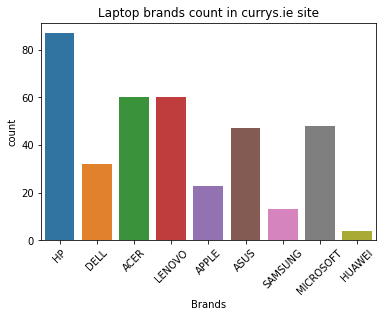

In [102]:
ax = sns.countplot(data=pc_data,x = 'company')
ax.tick_params('x', labelrotation = 45,labelsize=10)
plt.xlabel('Brands')
plt.title('Laptop brands count in currys.ie site')
plt.show()

In [103]:
print(pc_data['company'].describe())

count     374
unique      9
top        HP
freq       87
Name: company, dtype: object


Interpretation for laptop company:

Among all the brands HP company laptops are highest with count 87.

ACER and lenovo has a count of 60 each.

HUAWEI company laptops are less which is roughly less than 10.

In [104]:
print(pc_data['colour'].value_counts())

silver               133
grey                  58
blue                  43
black                 43
platinum              22
space grey            10
mystic silver          9
gold                   7
white                  6
graphite               6
ice blue               4
sandstone              4
slate grey             3
mystic navy            3
abyss blue             3
white & rose gold      3
matte black            3
obsidian               2
blue & grey            2
glacier                2
slate green            2
pink                   1
grey & black           1
abyss blue fabric      1
graphite grey          1
black & silver         1
red                    1
Name: colour, dtype: int64


In [105]:
print(pc_data['colour'].describe())

count        374
unique        27
top       silver
freq         133
Name: colour, dtype: object


Interpretation for colours:

Among all the colours silver colour is highest with count 133.

grey,blue and black has a count of more than 40.

In [106]:
print(pc_data['Processor'].describe())

count                                374
unique                                74
top       Intel Core i5-1135G7 Processor
freq                                  46
Name: Processor, dtype: object


Interpretation for processor:

Among all the processors highest processor is Intel Core i5-1135G7 with count of 46. 

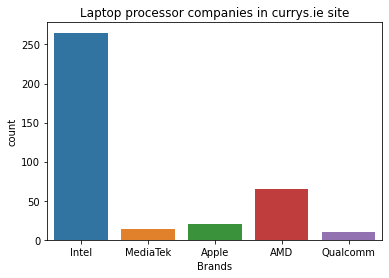

In [107]:
sns.countplot(data=pc_data,x = 'processor_company')
plt.xlabel('Brands')
plt.title('Laptop processor companies in currys.ie site')
plt.show()

In [108]:
print(pc_data['processor_company'].describe())

count       374
unique        5
top       Intel
freq        265
Name: processor_company, dtype: object


Interpretation for  company:
    
Among all the processor companies intel is highest with count 265.

AMD processors are more than 50 and less than 80.

MediaTek, Apple and Qualcomm has less than 25 processors.

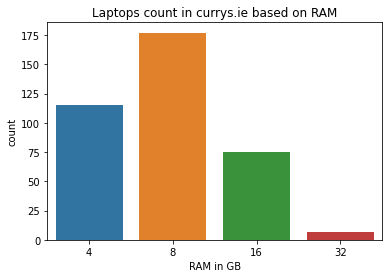

In [110]:
sns.countplot(data=pc_data,x = 'ram_in_GB')
plt.xlabel('RAM in GB')
plt.title('Laptops count in currys.ie based on RAM')
plt.show()

In [111]:
print(pc_data['ram_in_GB'].describe())

count    374.000000
mean       8.823529
std        5.285002
min        4.000000
25%        4.000000
50%        8.000000
75%        8.000000
max       32.000000
Name: ram_in_GB, dtype: float64


Interpretation for RAM:

In currys.ie website highest number of PC's are with 8GB RAM.

32 GB RAM PC's are less.

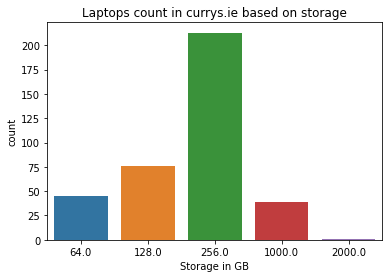

In [112]:
sns.countplot(data=pc_data,x='storage_in_GB')
plt.title('Laptops count in currys.ie based on storage')
plt.xlabel('Storage in GB')
plt.show()

In [114]:
print(pc_data['storage_in_GB'].describe())

count     374.000000
mean      289.133690
std       269.658265
min        64.000000
25%       128.000000
50%       256.000000
75%       256.000000
max      2000.000000
Name: storage_in_GB, dtype: float64


Interpretation for Storage(GB):

In currys.ie site highest number of laptops have 256 GB storage which is greater than the remaining all together.

There are about 75 laptops with 128 GB storage.

laptops categories with 64GB, 1000GB and 2000GB storage are less than 50.

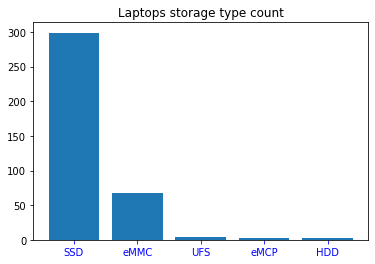

In [115]:
type_counts = dict(pc_data.storage_type.value_counts())
fig, ax = plt.subplots()
ax.bar(x = list(type_counts.keys()), height = list(type_counts.values()))
ax.tick_params('x', colors = 'blue')
plt.title('Laptops storage type count')
plt.show()

In [116]:
print(pc_data['storage_type'].describe())

count     374
unique      5
top       SSD
freq      299
Name: storage_type, dtype: object


Interpretation for Storage type:
    
Majority of laptops in currys.ie have SSD storage type.

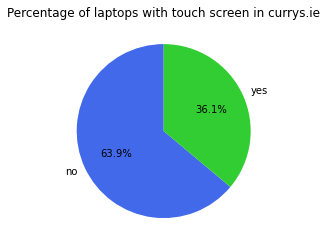

In [117]:
touch_counts = dict(pc_data.touch_screen.value_counts())
col = ['#4169E9','#32CD32']
plt.pie(touch_counts.values(),labels = touch_counts.keys(),startangle = 90,autopct='%1.1f%%',colors = col)
plt.title('Percentage of laptops with touch screen in currys.ie')
plt.show()

In [118]:
print(pc_data['touch_screen'].describe())

count     374
unique      2
top        no
freq      239
Name: touch_screen, dtype: object


Interpretation for touch screen:

Majority of the laptops in currys.ie don't have touch screen with a count of 239 among 374.

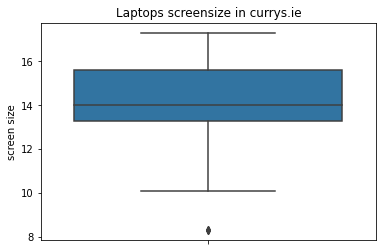

In [119]:
sns.boxplot(data=pc_data,y ='screen_size')
plt.title('Laptops screensize in currys.ie')
plt.ylabel('screen size',size=10)
plt.show()

In [120]:
print(pc_data['screen_size'].describe())

count    374.000000
mean      14.151337
std        1.516128
min        8.300000
25%       13.300000
50%       14.000000
75%       15.600000
max       17.300000
Name: screen_size, dtype: float64


Interpretation for screen size:

Most of the laptops has screen size between 13 inch and 15.6 inch.

Maximum screen size is 17.3 inch and minimum is 8.3 inch.


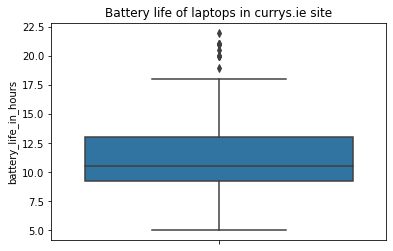

In [121]:
sns.boxplot(y = 'battery_life_in_hours', data = pc_data)
plt.title("Battery life of laptops in currys.ie site")
plt.show()

In [122]:
print(pc_data['battery_life_in_hours'].describe())

count    231.000000
mean      11.588745
std        3.776317
min        5.000000
25%        9.250000
50%       10.500000
75%       13.000000
max       22.000000
Name: battery_life_in_hours, dtype: float64


Interpretation for battery life:
    
Most of the laptops have battery life between 9.25 hours and 13 hours.

The data has outliers.

The median is roughly at 10.5 hours.

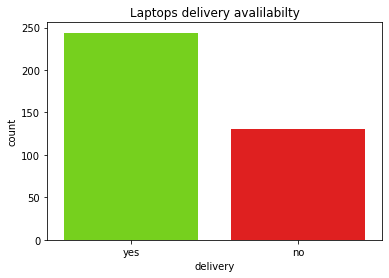

In [123]:
sns.countplot(data = pc_data,x = 'delivery',palette=["#76EE00","#FF0000"])
plt.title('Laptops delivery avalilabilty')
plt.show()

In [124]:
print(pc_data['delivery'].describe())

count     374
unique      2
top       yes
freq      244
Name: delivery, dtype: object


Interpretation for delivery:

Almost 250 laptops are available for delivery and less than 150 laptops are non-deliverable.

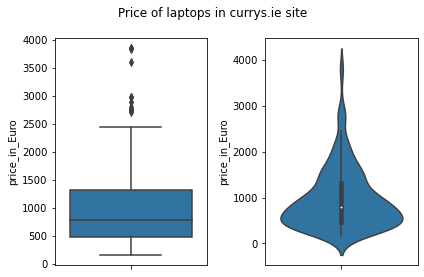

In [125]:
fig, ax = plt.subplots(1,2)
sns.boxplot(y = 'price_in_Euro', data = pc_data, ax = ax[0])
sns.violinplot(y = 'price_in_Euro', data = pc_data, ax = ax[1])
fig.suptitle("Price of laptops in currys.ie site")
plt.tight_layout(rect = [0, 0.03, 1, 1])
plt.show()

In [126]:
print(pc_data['price_in_Euro'].describe())

count     374.000000
mean      970.218930
std       667.707266
min       159.000000
25%       479.000000
50%       789.495000
75%      1326.500000
max      3849.000000
Name: price_in_Euro, dtype: float64


Interpretation for price:

Median of the price is roughly at 790 Euro's.

Price data has so many outliers.

The lower quartile is roughly at 479 Euro's and upper quartile is at 1327 Euro's.

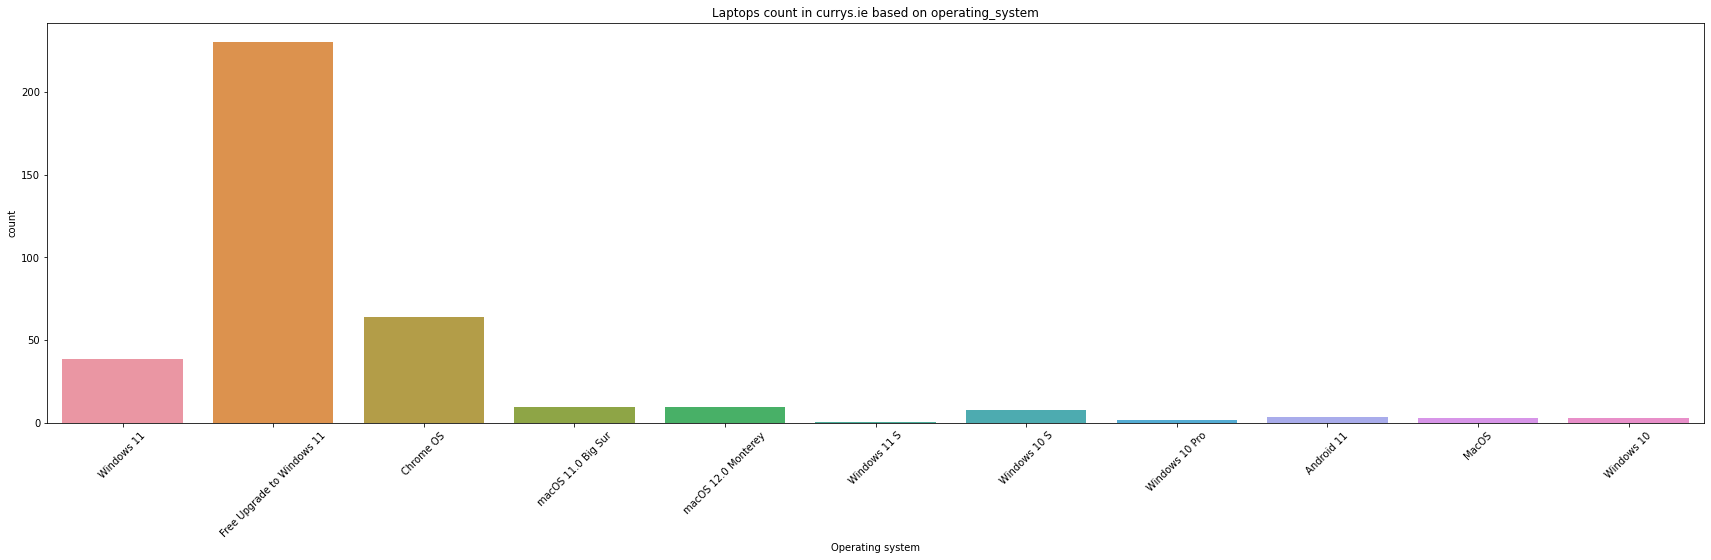

In [142]:
ax = sns.countplot(data=pc_data,x='operating_system')
plt.title('Laptops count in currys.ie based on operating_system')
ax.tick_params('x', labelrotation = 45,labelsize=10)
plt.xlabel('Operating system')
plt.tight_layout(rect = [0, 0.03, 4, 2])
plt.show()

In [143]:
pc_data['operating_system'].describe()

count                            374
unique                            11
top       Free Upgrade to Windows 11
freq                             230
Name: operating_system, dtype: object

Interpretation for OS:

Laptops with Free upgrade to windows 11 are highest in currys.ie website with a count of 230.

## bivariate plots
(Note: Format used: plot and then interpretation at the below of the plot.)

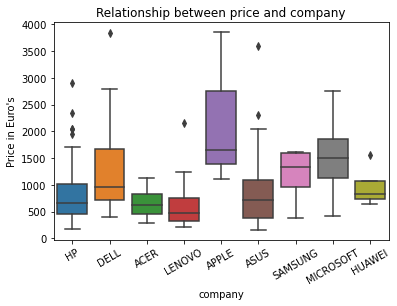

In [144]:
price_plot = sns.boxplot(x='company',y='price_in_Euro',data=pc_data)
price_plot.set_xticklabels(price_plot.get_xticklabels(), rotation=30)
plt.xlabel('company')
plt.ylabel("Price in Euro's")
plt.title('Relationship between price and company')
plt.show()

Apple brand laptops starts with highest prices.

Except Apple, Samsung and Microsoft remaining all companies price's median is less than 1000 in currys.ie website.

Most of the data has outliers.

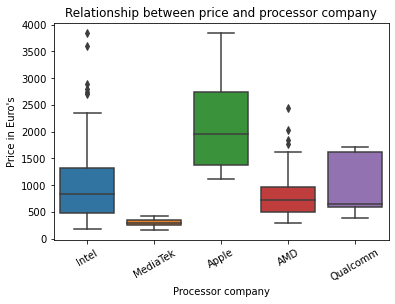

In [145]:
price_plot = sns.boxplot(x='processor_company',y='price_in_Euro',data=pc_data)
price_plot.set_xticklabels(price_plot.get_xticklabels(), rotation=30)
plt.xlabel('Processor company')
plt.ylabel("Price in Euro's")
plt.title('Relationship between price and processor company')
plt.show()

Intel and AMD companies processor's price has outliers.

Laptops prices which have MediaTek processor's are roughly less than 520 Euro's.

Median of Intel and AMD are slightly nearer to each other.

laptops with Apple processors are starts with high price than other brands.

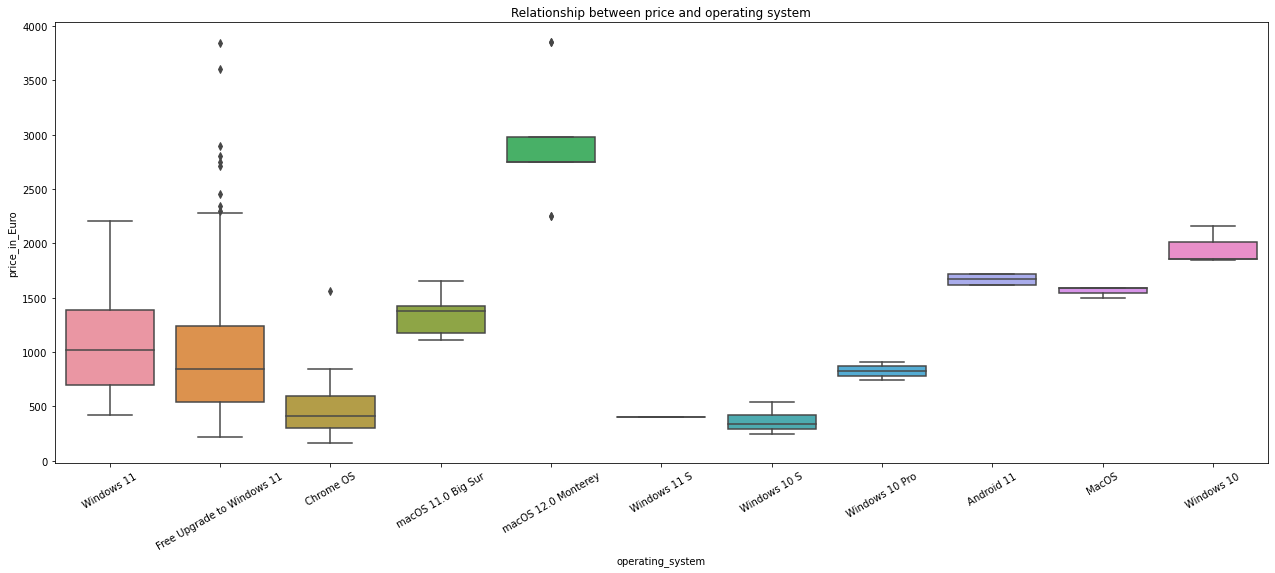

In [146]:
price_plot = sns.boxplot(x='operating_system',y='price_in_Euro',data=pc_data)
price_plot.set_xticklabels(price_plot.get_xticklabels(), rotation=30)
plt.tight_layout(rect = [0, 0.03, 3, 2])
plt.title('Relationship between price and operating system')
plt.show()

Prices of laptops with macos 12.0 Monterey is higher than 2000 Euro's.

Prices of laptops with chrome OS, windows 10s and windows 11s are overlapping.

Prices of laptops with MacOS, Windows 10 and Android 11 are higher than 1500 Euro's.

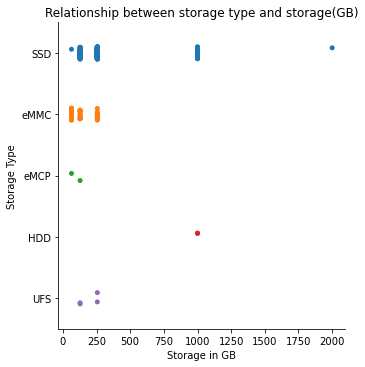

In [147]:
sns.catplot(x='storage_in_GB',y='storage_type',data=pc_data)
plt.xlabel('Storage in GB')
plt.ylabel('Storage Type')
plt.title('Relationship between storage type and storage(GB)')
plt.show()

Laptops with SSD storage have maximum 2000 GB storage and minimum 64 GB storage in curry.ie website.

Laptops with eMMC storage have maximum 256 GB storage and minimum 64 GB storage in curry.ie website.

Laptops with eMCP storage have maximum 128 GB storage and minimum 64 GB storage in curry.ie website.

Laptops with HDD storage have 1000 GB  of storage in curry.ie website.

Laptops with UFS storage have maximum 250 GB storage and minimum 128 GB storage in curry.ie website.

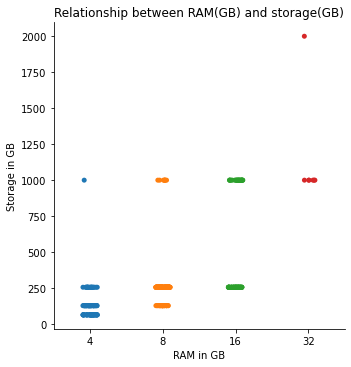

In [148]:
sns.catplot(y='storage_in_GB',x='ram_in_GB',data=pc_data)
plt.ylabel('Storage in GB')
plt.xlabel('RAM in GB')
plt.title('Relationship between RAM(GB) and storage(GB)')
plt.show()

Laptops with RAM of 4GB have storage of 64 GB minimum and 1000 GB maximum in currys.ie site.

Laptops with RAM of 8GB have storage of 128 GB minimum and 1000 GB maximum in currys.ie site.

Laptops with RAM of 4GB have storage of 256 GB minimum and 1000 GB maximum in currys.ie site.

Laptops with RAM of 4GB have storage of 1000 GB minimum and 2000 GB maximum in currys.ie site.

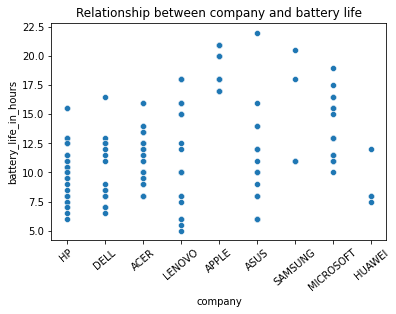

In [149]:
sns.scatterplot(x = 'company',y = 'battery_life_in_hours', data=pc_data)
plt.xlabel('company')
plt.xticks(rotation=40)
plt.title('Relationship between company and battery life')
plt.show()

HP company laptops have a battery life roughly between 5.5 hours and 15.5 hours.

DELL company laptops have a battery life roughly between 6.0 hours and 17 hours.

ACER company laptops have a battery life roughly between 7.6 hours and 17 hours.

LENOVO company laptops have a battery life roughly between 5.0 hours and 18 hours.

Apple company laptops have a battery life roughly between 16 hours and 22 hours.

SAMSUNG company laptops have a battery life roughly between 10 hours and 21 hours.

MICROSOFT company laptops have a battery life roughly between 9 hours and 19 hours.

HUAWEI company laptops have a battery life roughly between 7 hours and 13 hours.

### Multivariate plot

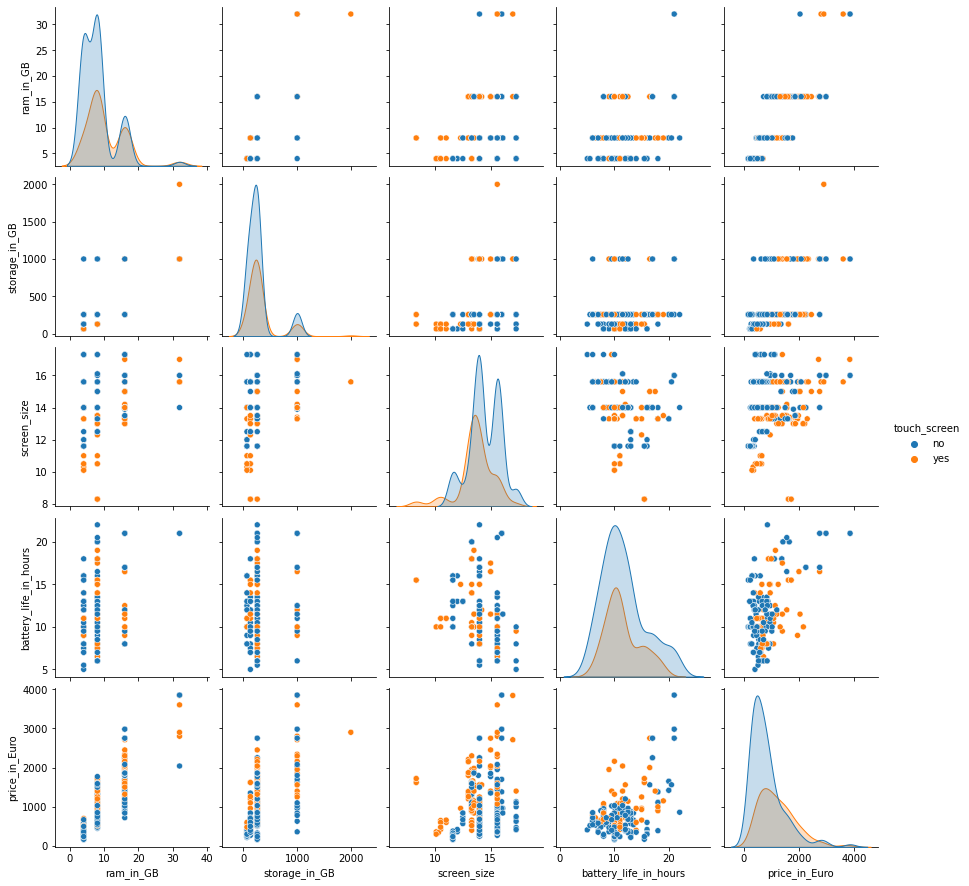

In [150]:
sns.pairplot(pc_data,hue = 'touch_screen')
plt.show()

Laptop prices increases slightly with increase in the battery life.

Laptop prices increases with increase in screen size.

Laptop prices increases with increase in RAM.

# 6. Results Section:

## univariate plots results:

Interpretation for laptop company:
Among all the brand's HP company laptops are the highest with a count of 87.
ACER and Lenovo have a count of 60 each.
HUAWEI company laptops are less which is roughly less than 10.

Interpretation for colors:
Among all the colors silver color is the highest with a count of 133.
grey, blue and black has a count of more than 40.

Interpretation for processor:
Among all the processors highest processor is the Intel Core i5-1135G7 with a count of 46.

Interpretation for processor company:
Among all the processor companies intel is highest with a count of 265.
AMD processors are more than 50 and less than 80.
MediaTek, Apple, and Qualcomm have less than 25 processors.

Interpretation for OS:
Laptops with Free upgrade to windows 11 are the highest in Currys.ie website with a count of 230.

Interpretation for RAM:
In currys.ie website highest number of PC's are with 8GB RAM.
32 GB RAM PC's are less.

Interpretation for Storage(GB):
In currys.ie site highest number of laptops have 256 GB storage which is greater than the remaining altogether.
There are about 75 laptops with 128 GB of storage.
laptops categories with 64GB, 1000GB, and 2000GB storage are less than 50.

Interpretation for Storage type:
The majority of laptops in currys.ie have SSD storage type.

Interpretation for touch screen:
The majority of the laptops are in currys.ie don't have a touchscreen with a count of 239 among 374.

Interpretation for battery life:
Most of the laptops have battery life between 9.25 hours and 13 hours.
The data has outliers.
The median is roughly at 10.5 hours.

Interpretation for delivery:
Almost 250 laptops are available for delivery and less than 150 laptops are non-deliverable.

Interpretation for price:
Median of the price is roughly 790 euros.
Price data has so many outliers.
The lower quartile is roughly at 479 Euro's and the upper quartile is at 1327 euros.

## Bivariate plots results:

Apple brand laptops start with the highest prices.
Except Apple, Samsung, and Microsoft remaining all companies' prices median is less than 1000 in currys.ie website.

Intel and AMD companies processor's price has outliers.
Laptops prices that have MediaTek processors are roughly less than 520 Euro.
The median of Intel and AMD are slightly nearer to each other.
laptops with Apple processors start with high prices than other brands.

Prices of laptops with macOS 12.0 Monterey is higher than 2000 Euro.
Prices of laptops with Chrome OS, windows 10s, and windows 11s are overlapping.
Prices of laptops with macOS, Windows 10, and Android 11 are higher than 1500 euros.

Laptops with SSD storage have a maximum of 2000 GB storage and a minimum of 64 GB storage in curry.ie website.
Laptops with eMMC storage have a maximum of 256 GB storage and a minimum of 64 GB storage in curry.ie website.
Laptops with eMCP storage have a maximum of 128 GB storage and a minimum of 64 GB storage in curry.ie website.
Laptops with HDD storage have 1000 GB of storage in curry.ie website.
Laptops with UFS storage have a maximum of 250 GB storage and a minimum of 128 GB storage in curry.ie website.

Laptops with RAM of 4GB have storage of 64 GB minimum and 1000 GB maximum in Currys.ie site.
Laptops with RAM of 8GB have storage of 128 GB minimum and 1000 GB maximum in currys.ie site.
Laptops with RAM of 4GB have storage of 256 GB minimum and 1000 GB maximum in currys.ie site.
Laptops with RAM of 4GB have storage of 1000 GB minimum and 2000 GB maximum in currys.ie site.

HP company laptops have a battery life of roughly between 5.5 hours and 15.5 hours.
DELL company laptops have a battery life of roughly between 6.0 hours and 17 hours.
ACER company laptops have a battery life of roughly between 7.6 hours and 17 hours.
LENOVO company laptops have a battery life of roughly between 5.0 hours and 18 hours.
Apple company laptops have a battery life of roughly between 16 hours and 22 hours.
SAMSUNG company laptops have a battery life of roughly between 10 hours and 21 hours.
MICROSOFT company laptops have a battery life of roughly between 9 hours and 19 hours.
HUAWEI company laptops have a battery life of roughly between 7 hours and 13 hours.

## Multivariate plot results:

Laptop prices increase slightly with an increase in the battery life.
Laptop prices increase with an increase in screen size.
Laptop prices increase with an increase in RAM.